In [ ]:
# Importando las librerias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Importando el dataset
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# Limpieza de datos
df = df.dropna()
# Definir las variables de entrenamiento
X = df.drop(columns=["Potability"])
y = df["Potability"]

In [25]:
# Normalización de datos  (solo escalado)

# El escalado permite reducir el costo computacional
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Valor min después de la estandarización: {X_scaled.min()}")
print(f"Valor min después de la estandarización: {X_scaled.max()}")

Valor min después de la estandarización: -4.957520078910543
Valor min después de la estandarización: 4.395581570758998


In [26]:
# Dividir el conjunto de datos para el entrenamiento y test

# random_state=42, permite una división ordenada del dataset para el entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [27]:
# Definir modelos
models = {
    "Logistic Regression" : LogisticRegression(max_iter=2000),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisitionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "GradientBoosting" : GradientBoostingClassifier(),
    "AdaBoost" : AdaBoostClassifier()
}


Logistic Regression - Accuracy: 0.5707, Log loss: 0.6919
KNeighbors - Accuracy: 0.6253, Log loss: 1.4033
DecisitionTree - Accuracy: 0.6377, Log loss: 13.0580
RandomForest - Accuracy: 0.6749, Log loss: 0.6081
SVM - Accuracy: 0.6725, Log loss: 0.6066
GradientBoosting - Accuracy: 0.6452, Log loss: 0.6390
AdaBoost - Accuracy: 0.5955, Log loss: 0.6647


<Figure size 800x600 with 0 Axes>

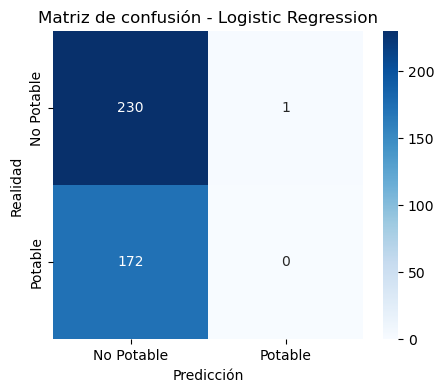

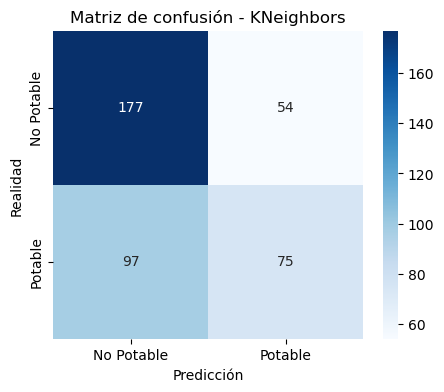

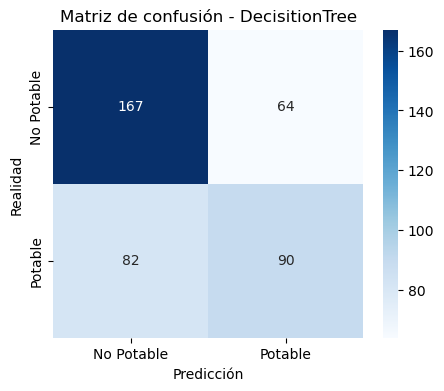

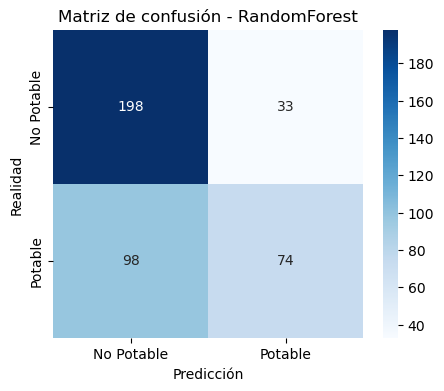

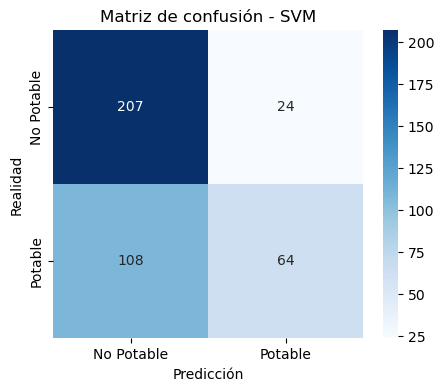

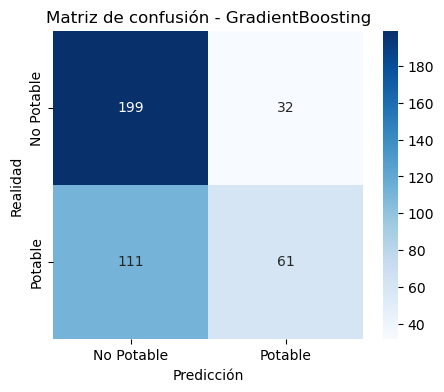

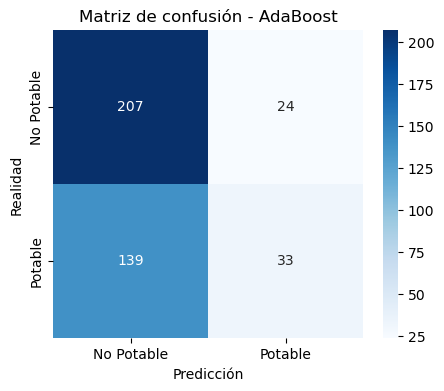

In [28]:
# Entrenar y evaluar modelos
plt.figure(figsize=(8, 6))
roc_curves = {}
accuracies = {}
log_losses = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcular y almacenar el accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    # Calcular y almacenar log loss
    loss = log_loss(y_test, y_prob)
    log_losses[name] = loss

    print(f"{name} - Accuracy: {accuracy:.4f}, Log loss: {loss:.4f}")

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Potable", "Potable"], yticklabels=["No Potable", "Potable"])
    plt.xlabel("Predicción")
    plt.ylabel("Realidad")
    plt.title(f"Matriz de confusión - {name}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)


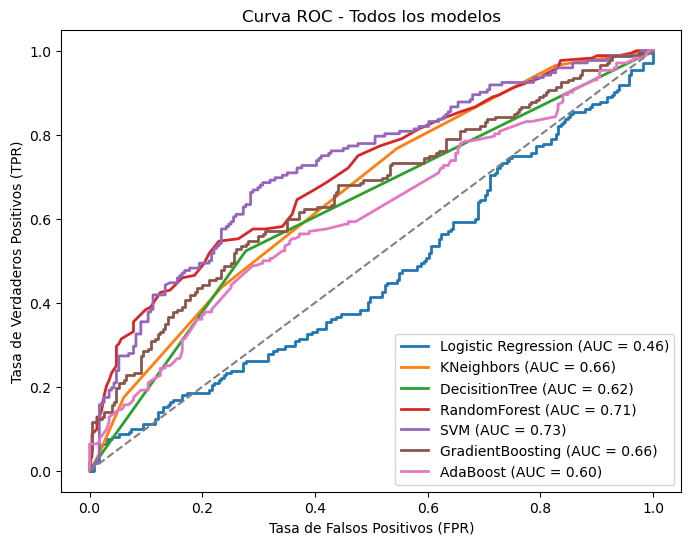

In [29]:
# Graficar todas ROCS en una sola gráfica
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_curves.items() :
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle="--")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Todos los modelos")
plt.legend(loc="lower right")

In [30]:
# Imprimir accuracies y log loss
print("Resultados de cada modelo: ")
for name in models.keys():
    print(f"{name} - Accuracy: {accuracies[name]:.4f}, Log Loss : {log_losses[name]:.4f}")


Resultados de cada modelo: 
Logistic Regression - Accuracy: 0.5707, Log Loss : 0.6919
KNeighbors - Accuracy: 0.6253, Log Loss : 1.4033
DecisitionTree - Accuracy: 0.6377, Log Loss : 13.0580
RandomForest - Accuracy: 0.6749, Log Loss : 0.6081
SVM - Accuracy: 0.6725, Log Loss : 0.6066
GradientBoosting - Accuracy: 0.6452, Log Loss : 0.6390
AdaBoost - Accuracy: 0.5955, Log Loss : 0.6647


#### Modelo a elegir
En función a los resultados obtenidos para cada modelo entrenado:

* Logistic Regression - Accuracy: 0.5707, Log loss: 0.6919
* KNeighbors - Accuracy: 0.6253, Log loss: 1.4033
* DecisitionTree - Accuracy: 0.6377, Log loss: 13.0580
* RandomForest - Accuracy: 0.6749, Log loss: 0.6081
* SVM - Accuracy: 0.6725, Log loss: 0.6066
* GradientBoosting - Accuracy: 0.6452, Log loss: 0.6390
* AdaBoost - Accuracy: 0.5955, Log loss: 0.6647

En función a la precisión y error obtenido en cada prueba el modelo entrenado que presente una mayor exactitud o accuracy es el SVM con un 67.25% de exactitud y un error de 0.6066 para la de metricas de la matriz de confusión y de un 73% de accuracy en función a la curva ROC con el mayor área el cual es un indicador de que es un modelo destacado entre el resto.